<a href="https://colab.research.google.com/github/vidakpop/Dow-component-based-on-their-distance-in-the-PCA-loading-matrix/blob/main/dow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yahoo_fin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.6 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=4badc1046534519527b0100af8b423bc9ff289ccae4b5e733ed970a11f8d0719
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=b26a9e024dfa56cd42d7cf3bdef58de616a685bba85b0e820ee579e9e0a15d8f
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k


[*********************100%***********************]  30 of 30 completed


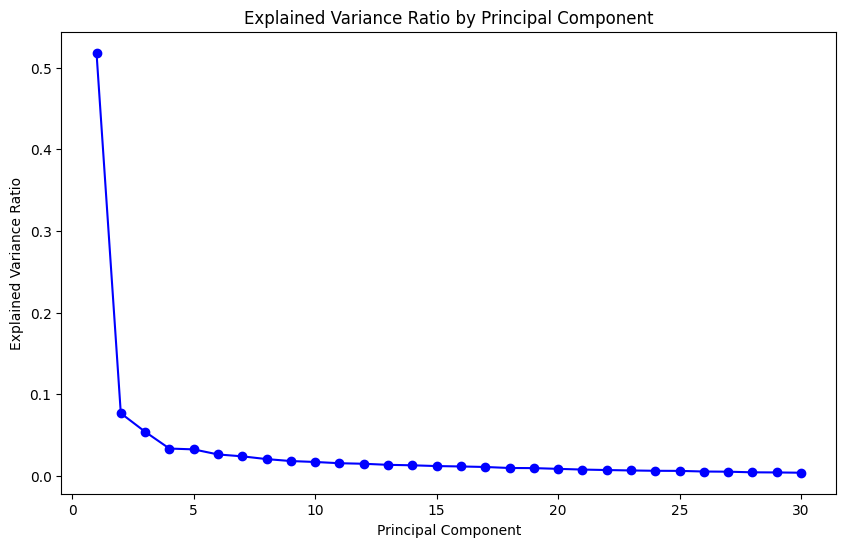

Loadings for the first principal component:
   Ticker   Loading
29    WMT -0.080481
27     VZ -0.084117
20    MRK -0.095384
15    JNJ -0.096250
23     PG -0.102811
1    AMGN -0.110813
17     KO -0.126805
18    MCD -0.140569
19    MMM -0.152511
28    WBA -0.159579
25    UNH -0.161018
13    IBM -0.163133
24    TRV -0.169779
6    CSCO -0.170921
11     HD -0.174883
21   MSFT -0.182811
5     CRM -0.185860
0    AAPL -0.189002
22    NKE -0.189469
26      V -0.192357
12    HON -0.193638
4     CAT -0.194753
8     DIS -0.202277
14   INTC -0.208694
7     CVX -0.219689
16    JPM -0.228172
10     GS -0.228309
9     DOW -0.239519
2     AXP -0.269496
3      BA -0.317147


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the list of Dow tickers
tickers = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW',
           'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
           'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']

# Define the start and end dates for the return history
start_date = '2019-01-01'
end_date = '2022-12-31'

# Retrieve the adjusted close prices for the tickers
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate the returns for each stock
returns_data = data.pct_change().dropna()

# Perform PCA
pca = PCA()
pca.fit(returns_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Get the principal components
principal_components = pca.components_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Analyze the loadings of the first principal component
pc1_loadings = principal_components[0]
pc1_loadings_df = pd.DataFrame({'Ticker': tickers, 'Loading': pc1_loadings})
pc1_loadings_df = pc1_loadings_df.sort_values('Loading', ascending=False)

print("Loadings for the first principal component:")
print(pc1_loadings_df)
